# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [4]:
import math

In [5]:
absolute_path = 'Data/data2/'

# Visualisation

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\4008865008.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 115 nodes and 613 edges


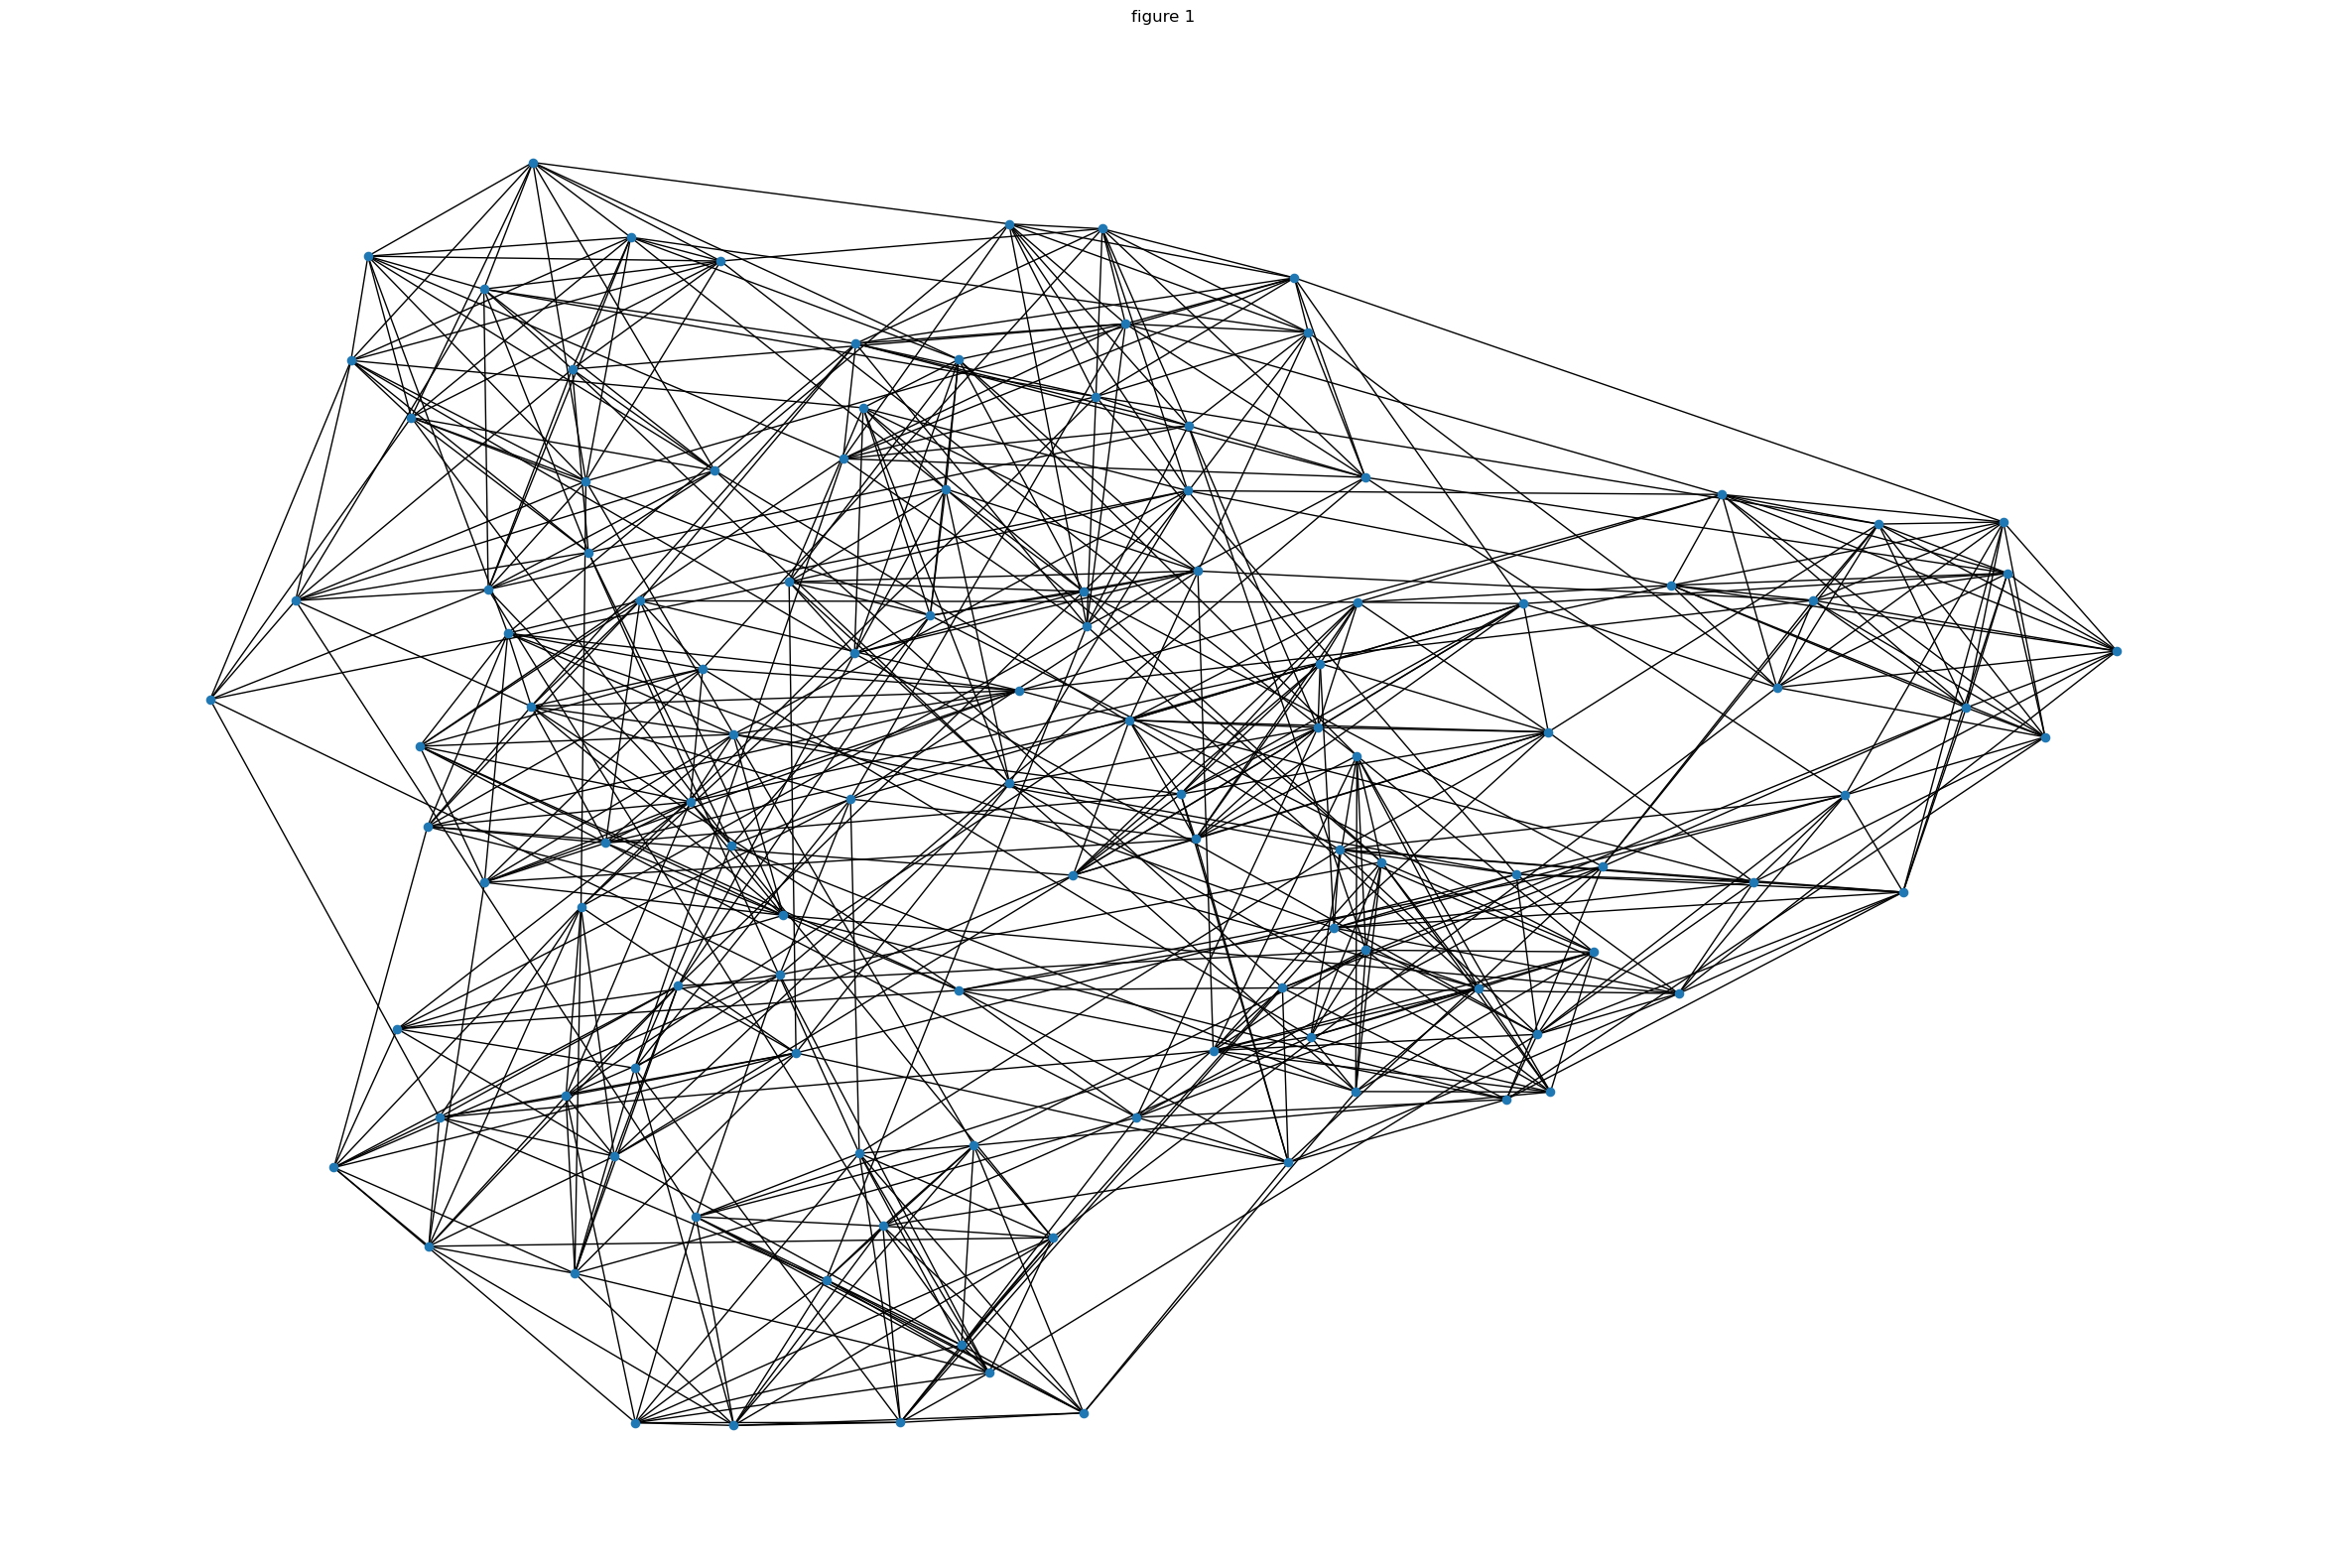

In [6]:
plt.figure(figsize=(30,20))
G=nx.read_edgelist('Data/football.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)
print(nx.info(G))
nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [7]:
row = G.number_of_nodes()

In [8]:
row+1

116

In [9]:
G

In [10]:
edge_mat= nx.to_numpy_array(G, nodelist=[i for i in range(1,row+1)])

In [11]:
print (edge_mat)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
data = pd.read_csv("Data/Matrix.csv")

In [13]:
data.index = data.index + 1

In [14]:
#Read our decision Matrix
data = pd.read_csv("Data/Matrix.csv")
data

,Node,w_Node,DC,BC,CC,EC
0,1,1,0.105263,0.032490,0.423792,0.106503
1,2,2,0.105263,0.017621,0.413043,0.096385
2,3,3,0.096491,0.010664,0.402827,0.101190
3,4,4,0.096491,0.011831,0.397213,0.106532
4,5,5,0.096491,0.022213,0.423792,0.103791
...,...,...,...,...,...,...
110,111,111,0.096491,0.017789,0.410072,0.092508
111,112,112,0.096491,0.012378,0.410072,0.087907
112,113,113,0.087719,0.011582,0.395833,0.073015
113,114,114,0.096491,0.006637,0.394464,0.116471


In [15]:
k=data.sort_values(by = ['w_Node'])
#data.to_csv("data.csv",index=False)

In [16]:
k

,Node,w_Node,DC,BC,CC,EC
0,1,1,0.105263,0.032490,0.423792,0.106503
1,2,2,0.105263,0.017621,0.413043,0.096385
2,3,3,0.096491,0.010664,0.402827,0.101190
3,4,4,0.096491,0.011831,0.397213,0.106532
4,5,5,0.096491,0.022213,0.423792,0.103791
...,...,...,...,...,...,...
110,111,111,0.096491,0.017789,0.410072,0.092508
111,112,112,0.096491,0.012378,0.410072,0.087907
112,113,113,0.087719,0.011582,0.395833,0.073015
113,114,114,0.096491,0.006637,0.394464,0.116471


In [17]:
k.to_csv("data.csv",index=False)

In [18]:
X = data[["DC","BC","CC","EC"]]


In [19]:
X

,DC,BC,CC,EC
0,0.105263,0.032490,0.423792,0.106503
1,0.105263,0.017621,0.413043,0.096385
2,0.096491,0.010664,0.402827,0.101190
3,0.096491,0.011831,0.397213,0.106532
4,0.096491,0.022213,0.423792,0.103791
...,...,...,...,...
110,0.096491,0.017789,0.410072,0.092508
111,0.096491,0.012378,0.410072,0.087907
112,0.087719,0.011582,0.395833,0.073015
113,0.096491,0.006637,0.394464,0.116471


In [20]:
influential = pd.read_csv("Data/w_Out1.csv")
inf10 = influential.head(10)
inf10

,Node,w_Node,DC,BC,CC,EC,C
0,65,65,0.096491,0.033533,0.422222,0.100915,0.976615
1,1,1,0.105263,0.032490,0.423792,0.106503,0.961193
2,107,107,0.096491,0.029161,0.435115,0.090415,0.853660
3,42,42,0.087719,0.028823,0.436782,0.079146,0.840744
4,75,75,0.096491,0.025187,0.404255,0.080489,0.724452
5,47,47,0.096491,0.024139,0.422222,0.089273,0.691313
6,81,81,0.096491,0.023836,0.423792,0.089921,0.681512
7,25,25,0.105263,0.023070,0.420664,0.106250,0.657666
8,84,84,0.096491,0.023046,0.402827,0.081215,0.655122
9,5,5,0.096491,0.022213,0.423792,0.103791,0.629590


# Top 10 influent (w_topsis)

In [21]:
Y = inf10[["DC","BC","CC","EC"]]
Yrr = Y.to_numpy()
Yrr

array([[0.09649123, 0.03353296, 0.42222222, 0.10091535],
       [0.10526316, 0.03248995, 0.42379182, 0.10650323],
       [0.09649123, 0.02916105, 0.4351145 , 0.0904148 ],
       [0.0877193 , 0.02882282, 0.43678161, 0.07914559],
       [0.09649123, 0.0251868 , 0.40425532, 0.08048861],
       [0.09649123, 0.02413942, 0.42222222, 0.08927305],
       [0.09649123, 0.02383635, 0.42379182, 0.08992131],
       [0.10526316, 0.0230701 , 0.42066421, 0.10624954],
       [0.09649123, 0.02304632, 0.40282686, 0.08121511],
       [0.09649123, 0.02221345, 0.42379182, 0.10379099]])

# User

In [22]:
#User
K = int(input("Enter the number of the top influential nodes:"))

Enter the number of the top influential nodes:10


In [23]:
kmeans = KMeans(n_clusters=K, init=Yrr, max_iter=20000, n_init=10, random_state=0).fit(X)

C:\Users\wail_maghrane\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [24]:
#Communities
label=kmeans.fit_predict(X)
for i in (label):
    print(i)

0
6
9
9
0
7
8
5
5
5
4
6
1
6
8
5
5
5
6
6
5
8
5
9
0
1
0
8
1
9
9
0
9
9
9
0
7
5
5
9
5
3
9
7
5
4
2
7
8
4
5
5
9
9
9
5
4
7
9
7
9
7
9
7
0
7
9
3
4
8
6
8
8
4
6
5
9
8
5
8
2
9
9
6
5
6
8
8
8
5
8
4
6
5
6
5
5
5
6
5
8
9
5
1
8
3
2
6
9
4
6
6
5
9
1


C:\Users\wail_maghrane\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [25]:
#centroîds after KMeans
centr = kmeans.cluster_centers_
centr

array([[0.09899749, 0.02420873, 0.42224043, 0.10499034],
       [0.10526316, 0.01920727, 0.42262564, 0.11734549],
       [0.09649123, 0.02571228, 0.42704285, 0.08986972],
       [0.08479532, 0.02260309, 0.42656369, 0.07382813],
       [0.07346491, 0.01143054, 0.39458047, 0.06326926],
       [0.09244265, 0.0114171 , 0.3956596 , 0.08423813],
       [0.09590643, 0.01743837, 0.40834809, 0.08689012],
       [0.09649123, 0.00684246, 0.37454359, 0.10704751],
       [0.09046053, 0.00751692, 0.38108819, 0.07754673],
       [0.09763539, 0.01272583, 0.40238022, 0.11028363]])

In [26]:
def distance_euclidean(data,center,j):
    T= pd.DataFrame()
    for i in range(len(data)):
        distance=math.sqrt((data['DC'][i]-center[j][0])**2+(data['BC'][i]-center[j][1])**2+
                           (data['CC'][i]-center[j][2])**2+(data['EC'][i]-center[j][3])**2)
        T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
    return T.sort_values(by='distance from center')

In [27]:
Res= pd.DataFrame()
for i in range(10):
    T=distance_euclidean(data,centr,i)
    Res=Res.append({'cluster':str(i), 'Node_before_KMeans':str(inf10['Node'][i]),
                    'Node_after_KMeans':int(T.head(1)['Node']),
                    'distance from center':float(T.head(1)['distance from center'])},ignore_index=True)

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1449566210.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Res=Res.append({'cluster':str(i), 'Node_before_KMeans':str(inf10['Node'][i]),
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureW

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\3092545731.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_109

In [28]:
Res

,cluster,Node_before_KMeans,Node_after_KMeans,distance from center
0,0,65,5,0.003756
1,1,1,29,0.002301
2,2,107,81,0.003754
3,3,42,68,0.007873
4,4,75,50,0.005705
5,5,47,10,0.005111
6,6,81,95,0.003046
7,7,25,60,0.007550
8,8,84,105,0.003952
9,9,5,35,0.004087


In [29]:
Res["Node_after_KMeans"] = Res["Node_after_KMeans"].astype(int)

In [30]:
Res["Node_after_KMeans"]

0      5
1     29
2     81
3     68
4     50
5     10
6     95
7     60
8    105
9     35
Name: Node_after_KMeans, dtype: int32

In [31]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['center'])
lab

,center
0,0
1,6
2,9
3,9
4,0
...,...
110,6
111,6
112,5
113,9


In [32]:
#Community of each Node
community = pd.concat([data, lab], axis=1)
community.head(40)


,Node,w_Node,DC,BC,CC,EC,center
0,1,1,0.105263,0.032490,0.423792,0.106503,0
1,2,2,0.105263,0.017621,0.413043,0.096385,6
2,3,3,0.096491,0.010664,0.402827,0.101190,9
3,4,4,0.096491,0.011831,0.397213,0.106532,9
4,5,5,0.096491,0.022213,0.423792,0.103791,0
5,6,6,0.096491,0.007589,0.385135,0.104482,7
6,7,7,0.087719,0.007354,0.387755,0.083368,8
7,8,8,0.096491,0.015476,0.397213,0.088460,5
8,9,9,0.087719,0.006439,0.395833,0.099137,5
9,10,10,0.096491,0.010095,0.395833,0.081418,5


In [33]:
gk = community.groupby('center')
n=gk.first()
n

,Node,w_Node,DC,BC,CC,EC
center,,,,,,
0,1,1,0.105263,0.032490,0.423792,0.106503
1,13,13,0.105263,0.018819,0.422222,0.113703
2,47,47,0.096491,0.024139,0.422222,0.089273
3,42,42,0.087719,0.028823,0.436782,0.079146
4,11,11,0.078947,0.008620,0.391753,0.075597
5,8,8,0.096491,0.015476,0.397213,0.088460
6,2,2,0.105263,0.017621,0.413043,0.096385
7,6,6,0.096491,0.007589,0.385135,0.104482
8,7,7,0.087719,0.007354,0.387755,0.083368


In [34]:
commNum = community['Node'].to_numpy()

In [35]:
 community

,Node,w_Node,DC,BC,CC,EC,center
0,1,1,0.105263,0.032490,0.423792,0.106503,0
1,2,2,0.105263,0.017621,0.413043,0.096385,6
2,3,3,0.096491,0.010664,0.402827,0.101190,9
3,4,4,0.096491,0.011831,0.397213,0.106532,9
4,5,5,0.096491,0.022213,0.423792,0.103791,0
...,...,...,...,...,...,...,...
110,111,111,0.096491,0.017789,0.410072,0.092508,6
111,112,112,0.096491,0.012378,0.410072,0.087907,6
112,113,113,0.087719,0.011582,0.395833,0.073015,5
113,114,114,0.096491,0.006637,0.394464,0.116471,9


In [36]:
recomm = Res["Node_after_KMeans"]

In [37]:
df1=[]
df2=[]
df3=[]
df4=[]
df5=[]
for i in range(K):
    for j in range(row):
        if (recomm[i] == data['Node'][j]):
            df1.append(data['Node'][j].tolist())
            df2.append(data['DC'][j].tolist())
            df3.append(data['BC'][j].tolist())
            df4.append(data['CC'][j].tolist())
            df5.append(data['EC'][j].tolist())

            
#df = pd.DataFrame(df1,df2,df3,df4,df5,columns = ['Node','DC','BC','CC','EC'])
list1 = [df1,df2,df3,df4,df5]

In [38]:
dff1 = pd.DataFrame(df1,columns = ['Node'])
dff2 = pd.DataFrame(df2,columns = ['DC'])
dff3 = pd.DataFrame(df3,columns = ['BC'])
dff4 = pd.DataFrame(df4,columns = ['CC'])
dff5 = pd.DataFrame(df5,columns = ['EC'])

In [39]:
Final_Tab = pd.concat([dff1,dff2,dff3,dff4,dff5],axis=1)
Final_Tab

,Node,DC,BC,CC,EC
0,5,0.096491,0.022213,0.423792,0.103791
1,29,0.105263,0.020895,0.423792,0.116303
2,81,0.096491,0.023836,0.423792,0.089921
3,68,0.087719,0.020700,0.423792,0.080319
4,50,0.070175,0.010385,0.395833,0.058903
5,10,0.096491,0.010095,0.395833,0.081418
6,95,0.096491,0.015087,0.410072,0.087550
7,60,0.096491,0.006733,0.367742,0.110323
8,105,0.087719,0.009540,0.381271,0.075553
9,35,0.096491,0.011781,0.402827,0.106501


In [40]:
w_footballA= pd.read_csv("Data/w_Football.csv") 
w_footballA

,w_DCN,w_BCN,w_CCN,w_ECN,w_Node
0,24,65,42,83,65
1,53,1,107,104,1
2,2,107,115,115,107
3,13,42,36,53,42
4,26,75,26,62,75
5,115,47,29,102,47
6,37,81,1,82,81
7,29,25,81,109,25
8,104,84,5,114,84
9,83,5,68,29,5


In [41]:
        DCR = Final_Tab[["Node", "DC"]]
        DCR = DCR.sort_values(by='DC', ascending=False)
        DCR.rename(columns = {'Node':'DCN'}, inplace=True)

        DCR["DCN"].to_csv(absolute_path+"data/nodeKk/DCR.csv",index=False)
        
        Node = Final_Tab[["Node"]]
        Node['Node'].to_csv(absolute_path+"data/nodeKk/Node.csv",index=False)
#The top-10 ranked nodes by betweenness centrality (BC)
        BCR = Final_Tab[["Node", "BC"]]
        BCR = BCR.sort_values(by='BC', ascending=False)
        BCR.rename(columns = {'Node':'BCN'}, inplace=True)

        BCR["BCN"].to_csv(absolute_path+"data/nodeKk/BCR.csv",index=False)



#The top-10 ranked nodes by closeness centrality (CC)
        CCR = Final_Tab[["Node", "CC"]]
        CCR = CCR.sort_values(by='CC', ascending=False)
        CCR.rename(columns = {'Node':'CCN'}, inplace=True)

        CCR["CCN"].to_csv(absolute_path+"data/nodeKk/CCR.csv",index=False)

        footballA = pd.concat([pd.read_csv(absolute_path+"data/nodeKk/Node.csv"),pd.read_csv(absolute_path+"data/nodeKk/DCR.csv"),pd.read_csv(absolute_path+"data/nodeKk/BCR.csv"), pd.read_csv(absolute_path+"data/nodeKk/CCR.csv")],axis=1)

footballA.to_csv(absolute_path+"data/dataFilterK/data.csv",index=False)
    

footballA



,Node,DCN,BCN,CCN
0,5,29,81,5
1,29,5,5,29
2,81,81,29,81
3,68,10,68,68
4,50,95,95,95
5,10,60,35,35
6,95,35,50,50
7,60,68,10,10
8,105,105,105,105
9,35,50,60,60


# Application SI (centroide and top 10 w_topsis)

In [64]:
def SI(node):
    n = row
    model = ep.SIModel(G)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [65]:
Rank_DC = SI(set(footballA['DCN']))
Rank_BC = SI(set(footballA['BCN']))
Rank_CC = SI(set(footballA['CCN']))
Rank_kmeans_After = SI(set(footballA['Node']))

In [66]:
w_Rank_DC = SI(set(w_footballA['w_DCN']))
w_Rank_BC = SI(set(w_footballA['w_BCN']))
w_Rank_CC = SI (set(w_footballA['w_CCN']))
w_Rank_EC = SI(set(w_footballA['w_ECN']))
w_Rank_Topsis = SI(set(w_footballA['w_Node']))

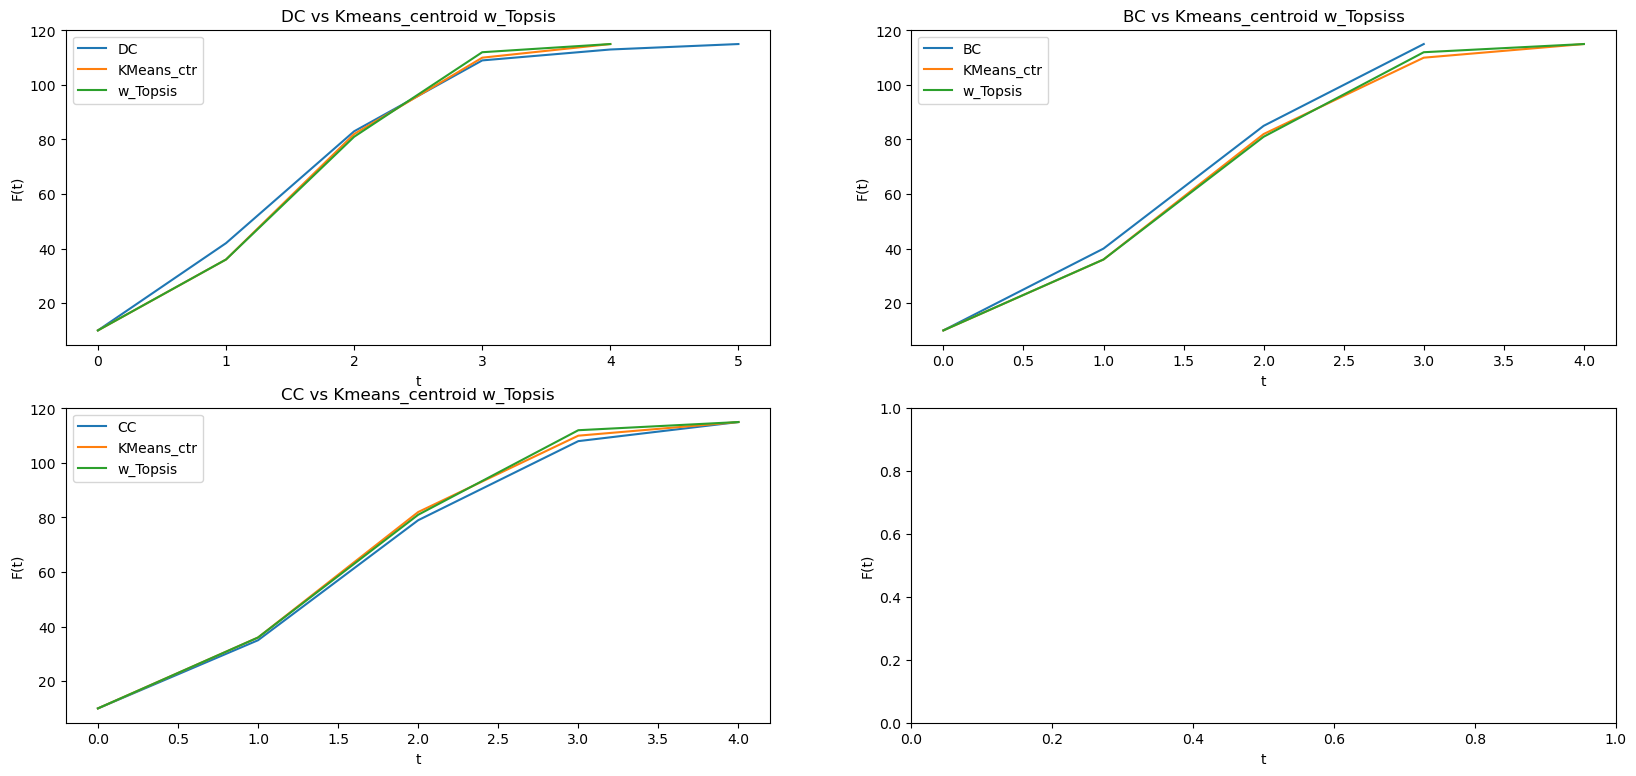

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(20, 9))
axs[0, 0].plot(w_Rank_DC['iteration'], w_Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_kmeans_After['iteration'],Rank_kmeans_After['Nb_infected'], label="KMeans_ctr")
axs[0, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 0].set_title("DC vs Kmeans_centroid w_Topsis")
axs[0, 0].legend()

axs[0, 1].plot(w_Rank_BC['iteration'], w_Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_kmeans_After['iteration'], Rank_kmeans_After['Nb_infected'], label="KMeans_ctr")
axs[0, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 1].set_title("BC vs Kmeans_centroid w_Topsiss")
axs[0, 1].legend()

axs[1, 0].plot(w_Rank_CC['iteration'], w_Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_kmeans_After['iteration'], Rank_kmeans_After['Nb_infected'], label="KMeans_ctr")
axs[1, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 0].set_title("CC vs Kmeans_centroid w_Topsis")
axs[1, 0].legend()



for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')

In [68]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(K):
    comm.append(gk.get_group(i)['Node'].tolist())


In [47]:
Comm= []
for i in range(K):
    print("Nodes of Community [",i,"] =",comm[i])
    

Nodes of Community [ 0 ] = [1, 5, 25, 27, 32, 36, 65]
Nodes of Community [ 1 ] = [13, 26, 29, 104, 115]
Nodes of Community [ 2 ] = [47, 81, 107]
Nodes of Community [ 3 ] = [42, 68, 106]
Nodes of Community [ 4 ] = [11, 46, 50, 57, 69, 74, 92, 110]
Nodes of Community [ 5 ] = [8, 9, 10, 16, 17, 18, 21, 23, 38, 39, 41, 45, 51, 52, 56, 76, 79, 85, 90, 94, 96, 97, 98, 100, 103, 113]
Nodes of Community [ 6 ] = [2, 12, 14, 19, 20, 71, 75, 84, 86, 93, 95, 99, 108, 111, 112]
Nodes of Community [ 7 ] = [6, 37, 44, 48, 58, 60, 62, 64, 66]
Nodes of Community [ 8 ] = [7, 15, 22, 28, 49, 70, 72, 73, 78, 80, 87, 88, 89, 91, 101, 105]
Nodes of Community [ 9 ] = [3, 4, 24, 30, 31, 33, 34, 35, 40, 43, 53, 54, 55, 59, 61, 63, 67, 77, 82, 83, 102, 109, 114]


1
 	 node 1 is connected with :1
 	 node 1 is connected with :5
5
 	 node 5 is connected with :5
25
 	 node 25 is connected with :32
 	 node 25 is connected with :36
27
32
 	 node 32 is connected with :25
 	 node 32 is connected with :65
36
 	 node 36 is connected with :25
65
Done adding k_0


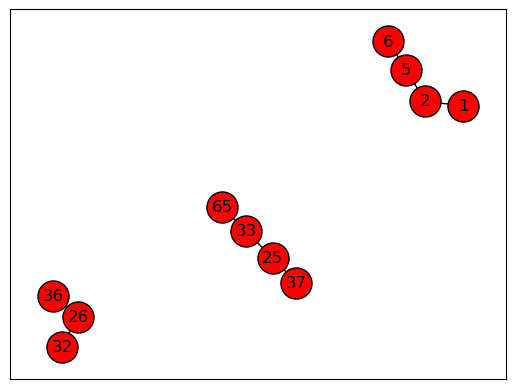

13
26
 	 node 26 is connected with :29
29
 	 node 29 is connected with :26
 	 node 29 is connected with :29
104
 	 node 104 is connected with :13
115
Done adding k_1


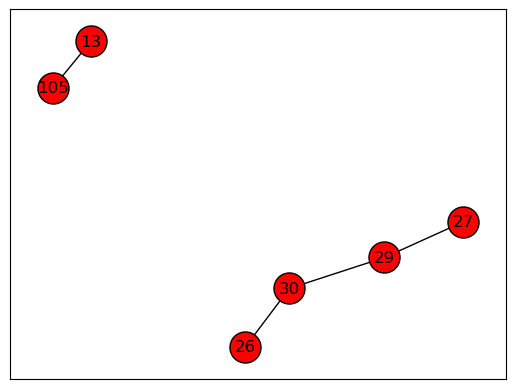

47
 	 node 47 is connected with :107
81
 	 node 81 is connected with :107
107
 	 node 107 is connected with :107
Done adding k_2


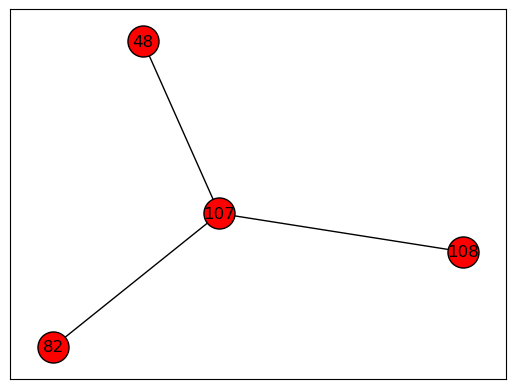

42
68
 	 node 68 is connected with :68
106
Done adding k_3


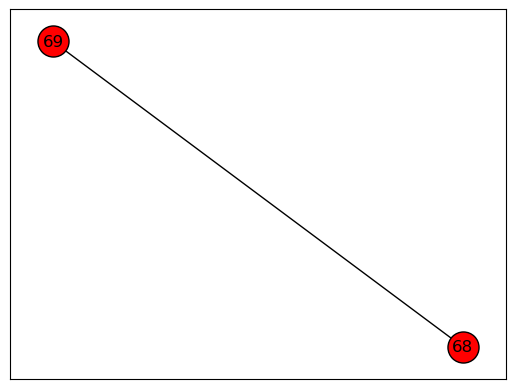

11
 	 node 11 is connected with :46
 	 node 11 is connected with :57
46
 	 node 46 is connected with :46
 	 node 46 is connected with :74
50
 	 node 50 is connected with :50
57
 	 node 57 is connected with :69
 	 node 57 is connected with :74
69
 	 node 69 is connected with :46
74
 	 node 74 is connected with :69
92
110
Done adding k_4


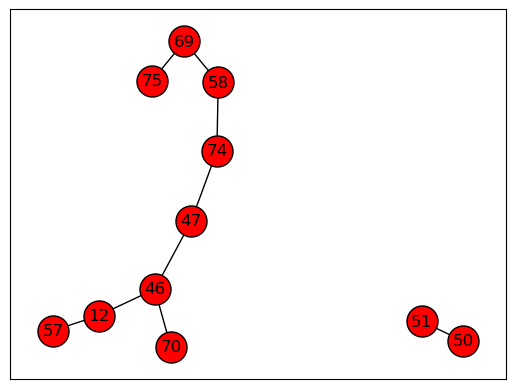

8
 	 node 8 is connected with :94
 	 node 8 is connected with :96
 	 node 8 is connected with :97
9
 	 node 9 is connected with :39
10
 	 node 10 is connected with :85
 	 node 10 is connected with :98
16
 	 node 16 is connected with :16
 	 node 16 is connected with :18
 	 node 16 is connected with :21
17
 	 node 17 is connected with :18
 	 node 17 is connected with :21
18
21
 	 node 21 is connected with :16
 	 node 21 is connected with :18
 	 node 21 is connected with :21
 	 node 21 is connected with :98
23
 	 node 23 is connected with :16
 	 node 23 is connected with :18
 	 node 23 is connected with :21
 	 node 23 is connected with :94
 	 node 23 is connected with :96
38
 	 node 38 is connected with :10
 	 node 38 is connected with :45
39
 	 node 39 is connected with :56
41
 	 node 41 is connected with :39
 	 node 41 is connected with :103
45
 	 node 45 is connected with :39
 	 node 45 is connected with :51
51
 	 node 51 is connected with :39
 	 node 51 is connected with :51
52
 	 nod

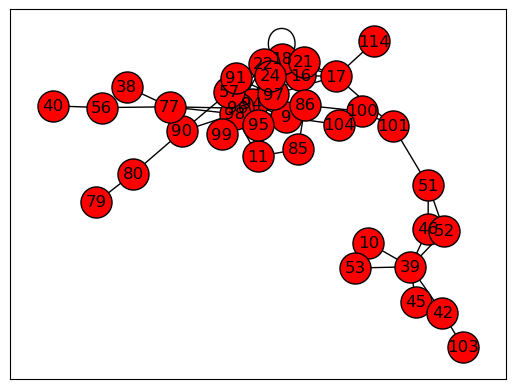

2
 	 node 2 is connected with :14
 	 node 2 is connected with :19
 	 node 2 is connected with :20
12
 	 node 12 is connected with :2
 	 node 12 is connected with :12
14
 	 node 14 is connected with :20
19
 	 node 19 is connected with :20
20
 	 node 20 is connected with :93
71
 	 node 71 is connected with :14
 	 node 71 is connected with :84
 	 node 71 is connected with :86
75
 	 node 75 is connected with :71
 	 node 75 is connected with :75
84
 	 node 84 is connected with :84
 	 node 84 is connected with :99
86
 	 node 86 is connected with :12
 	 node 86 is connected with :84
 	 node 86 is connected with :86
 	 node 86 is connected with :111
93
 	 node 93 is connected with :71
 	 node 93 is connected with :75
 	 node 93 is connected with :84
95
 	 node 95 is connected with :19
 	 node 95 is connected with :93
 	 node 95 is connected with :95
99
 	 node 99 is connected with :14
 	 node 99 is connected with :20
 	 node 99 is connected with :75
 	 node 99 is connected with :84
 	 node 99 

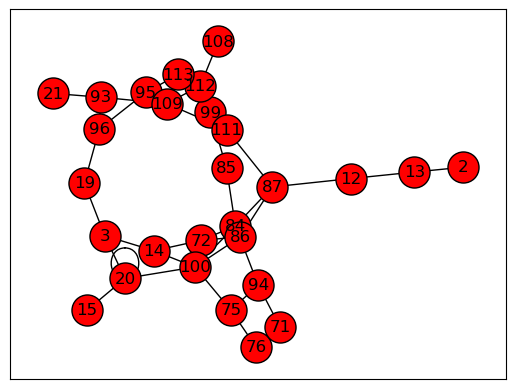

6
37
 	 node 37 is connected with :37
 	 node 37 is connected with :48
44
 	 node 44 is connected with :48
48
 	 node 48 is connected with :58
 	 node 48 is connected with :60
 	 node 48 is connected with :62
 	 node 48 is connected with :66
58
 	 node 58 is connected with :58
 	 node 58 is connected with :60
 	 node 58 is connected with :62
 	 node 58 is connected with :66
60
 	 node 60 is connected with :58
 	 node 60 is connected with :60
 	 node 60 is connected with :62
 	 node 60 is connected with :66
62
 	 node 62 is connected with :62
64
 	 node 64 is connected with :60
 	 node 64 is connected with :62
 	 node 64 is connected with :66
66
 	 node 66 is connected with :58
 	 node 66 is connected with :60
 	 node 66 is connected with :62
 	 node 66 is connected with :66
Done adding k_7


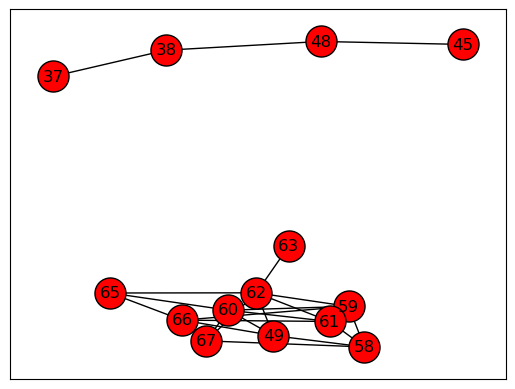

7
 	 node 7 is connected with :15
 	 node 7 is connected with :22
 	 node 7 is connected with :89
15
 	 node 15 is connected with :70
 	 node 15 is connected with :87
 	 node 15 is connected with :105
22
 	 node 22 is connected with :15
 	 node 22 is connected with :22
28
 	 node 28 is connected with :28
 	 node 28 is connected with :78
49
70
 	 node 70 is connected with :70
 	 node 70 is connected with :72
 	 node 70 is connected with :73
72
 	 node 72 is connected with :72
 	 node 72 is connected with :73
 	 node 72 is connected with :78
 	 node 72 is connected with :89
 	 node 72 is connected with :91
73
 	 node 73 is connected with :7
 	 node 73 is connected with :78
 	 node 73 is connected with :91
78
 	 node 78 is connected with :72
 	 node 78 is connected with :78
80
 	 node 80 is connected with :72
 	 node 80 is connected with :78
87
 	 node 87 is connected with :15
 	 node 87 is connected with :70
 	 node 87 is connected with :88
88
 	 node 88 is connected with :70
 	 node 88 

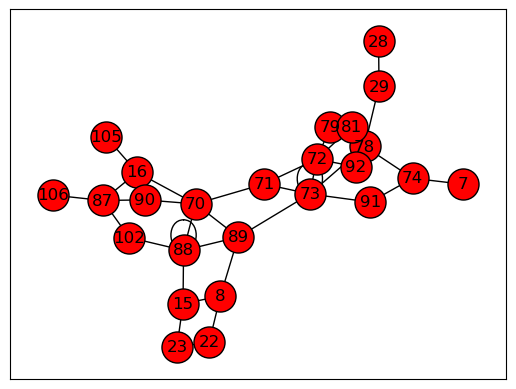

3
 	 node 3 is connected with :3
 	 node 3 is connected with :4
4
 	 node 4 is connected with :4
 	 node 4 is connected with :31
 	 node 4 is connected with :59
24
 	 node 24 is connected with :24
 	 node 24 is connected with :30
 	 node 24 is connected with :31
 	 node 24 is connected with :33
 	 node 24 is connected with :34
 	 node 24 is connected with :35
30
 	 node 30 is connected with :30
 	 node 30 is connected with :31
 	 node 30 is connected with :34
 	 node 30 is connected with :53
 	 node 30 is connected with :54
 	 node 30 is connected with :59
31
 	 node 31 is connected with :31
 	 node 31 is connected with :35
 	 node 31 is connected with :54
 	 node 31 is connected with :109
33
 	 node 33 is connected with :24
 	 node 33 is connected with :33
 	 node 33 is connected with :40
34
 	 node 34 is connected with :24
 	 node 34 is connected with :40
 	 node 34 is connected with :43
 	 node 34 is connected with :61
35
 	 node 35 is connected with :31
 	 node 35 is connected with

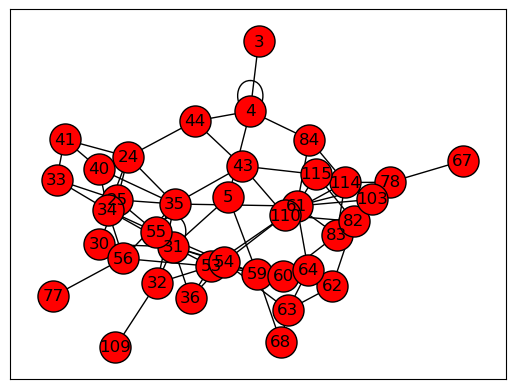

In [48]:
for i in  range(K):
    with open(absolute_path+"k_"+ str(i) +".txt", 'w') as fp:
        for item in comm[i]:
            print(item)
            for j in range(0, row):
                if edge_mat[item-1][j]==1 and j in comm[i]:
                    items = str(item+1)+ ' ' +str(j)
                    fp.write( "%s\n" % items )
                    print(' \t node '+str(item) + ' is connected with :'+str(j))
        print( 'Done adding k_'+ str(i) )
    Graph = nx.read_edgelist(absolute_path+"k_"+ str(i) +".txt",create_using=nx.Graph(),nodetype=int)
    sp = nx.spring_layout(Graph)
    nx.draw_networkx(Graph,pos=sp,node_color='red',with_labels=True,edgecolors='black',node_size=500)
    plt.show()

In [49]:
from math import *
import import_ipynb 
from TOPSIS1 import Topsis

importing Jupyter notebook from TOPSIS1.ipynb


In [50]:

def apply_w_topsis(dx):    
    Graph = nx.read_edgelist(absolute_path+"k_"+ str(dx) +".txt",create_using=nx.Graph(),nodetype=int)
    sp = nx.spring_layout(Graph)
    nx.draw_networkx(Graph,pos=sp,node_color='red',with_labels=True,edgecolors='black',node_size=500)
    row = Graph.number_of_nodes()
    print(row)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    deg_centrality = nx.degree_centrality(Graph)
    bet_centrality = nx.betweenness_centrality(Graph)
    close_centrality = nx.closeness_centrality(Graph)
    #eig_centrality=nx.eigenvector_centrality(Graph)
    Matrix=pd.DataFrame()
    for noued in Graph:
    #add the name of each node with its measures centrality
        Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued]}, ignore_index=True)
    Matrix.to_csv(absolute_path+"data/Matrix.csv" ,index=False)
    Matrix_arr= Matrix[['DC','BC','CC']].to_numpy()
    m = row
    ev_matrix_np = Matrix_arr
    sum = np.zeros(4)

    for i in range(m):
        for j in range(3):
            sum[j] += ev_matrix_np[i][j]

    p = np.copy(ev_matrix_np)

    for i in range(m):
        for j in range(3):
            p[i][j] = ev_matrix_np[i][j]/sum[j]
    k = 1/log(m)
    E = []
    for j in range(3):
        temp_sum = 0
        for i in range(m):
            try:
                pij = p[i][j]
                temp_sum += pij*log(pij)
            except:
                pij = 1
                temp_sum += pij*log(pij)
        E.append(-k*temp_sum)
    D = []
    for i in range(3):
        D.append(1-E[i])
    sm = np.sum(D)
    weights = [D[i]/sm for i in range(3)]
    weights
    Evaluation_matrix = Matrix_arr

    criteria = np.array([True,True,True,True])

    T = Topsis(Evaluation_matrix,weights,criteria)
    print(T.calc())
    print("best_distance\t", T.best_distance)
    print("worst_distance\t", T.worst_distance)
    print("worst_similarity\t", T.worst_similarity)
    print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())
    print("best_similarity\t", T.best_similarity)
    print("rank_to_best_similarity\t", T.rank_to_best_similarity())
    #Convert S+ and S- to array numpy
    Best_Dist = np.array(T.best_distance)
    Worst_Dist = np.array(T.worst_distance)
# Calculate Closness
    Closnness = []
    Closnness = Worst_Dist / (Worst_Dist + Best_Dist)
# print(Closnness)
#Convert S+, S- and Closnness to DataFrame 
    Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
    Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
    Clos = pd.DataFrame(Closnness,columns=['C'])
# Concatenate results
    Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
# print(Out)
#sort DataFrame by Closnness Column (Descending)
    Out = Out.sort_values(by="C",ascending=False)
# Out

# Save it into a csv file (out.csv)
    Out.to_csv(absolute_path+"data/Out_"+ str(dx) +".csv",index=False)
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
    def ranking_closness(data):
        return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
    C = ranking_closness(Closnness)
#retrieve the nodes that correspond to the indices returned by the function above
    Tab = []
    for i in range(len(C)):
        Tab.append(Matrix['Node'].loc[C[i]])
#Convert Tab above to DataFrame 
    Tab_Data=pd.DataFrame(Tab,columns=["Node"])

    Tab_Data["Node"].to_csv(absolute_path+"data/cluster_topsis/Topsis_"+ str(dx) +".csv",index=False)
    Final_Tab = pd.concat([pd.read_csv(absolute_path+"data/Out_"+ str(dx) +".csv"),Tab_Data],axis=1)
    print(Final_Tab)

    Out1 = pd.concat([Matrix, Clos], axis=1)
# Out1
    Out1 = Out1.sort_values(by="C",ascending=False)
# Out1

# Save it into a csv file (out.csv)
    Out1.to_csv(absolute_path+"data/Out1_"+ str(dx) +".csv",index=False)
    # Final_Tab1 = pd.concat([pd.read_csv(absolute_path+"data/Out1_"+ str(dx) +".csv")],axis=1)
    res= pd.concat([pd.read_csv(absolute_path+"data/Out1_"+ str(dx) +".csv"),pd.read_csv(absolute_path+"data/Out_"+ str(dx) +".csv")],axis=1)
    res.to_csv(absolute_path+"data/res/res_"+ str(dx) +".csv",index=False)
    
    #The top-10 ranked nodes by degree centrality (DC)
    DCR = res[["Node", "DC"]]
    DCR = DCR.sort_values(by='DC', ascending=False)
    DCR.rename(columns = {'Node':'DCN'}, inplace=True)

    DCR["DCN"].to_csv(absolute_path+"data/SI/DCR"+ str(dx) +".csv",index=False)



#The top-10 ranked nodes by betweenness centrality (BC)
    BCR = res[["Node", "BC"]]
    BCR = BCR.sort_values(by='BC', ascending=False)
    BCR.rename(columns = {'Node':'BCN'}, inplace=True)

    BCR["BCN"].to_csv(absolute_path+"data/SI/BCR"+ str(dx) +".csv",index=False)



#The top-10 ranked nodes by closeness centrality (CC)
    CCR = res[["Node", "CC"]]
    CCR = CCR.sort_values(by='CC', ascending=False)
    CCR.rename(columns = {'Node':'CCN'}, inplace=True)

    CCR["CCN"].to_csv(absolute_path+"data/SI/CCR"+ str(dx) +".csv",index=False)


    fac = pd.concat([pd.read_csv(absolute_path+"data/SI/DCR"+ str(dx) +".csv"),pd.read_csv(absolute_path+"data/SI/BCR"+ str(dx) +".csv"), pd.read_csv(absolute_path+"data/SI/CCR"+ str(dx) +".csv")],axis=1)

    facebook = pd.concat([pd.read_csv(absolute_path+"data/cluster_topsis/Topsis_"+ str(dx) +".csv"),fac],axis=1)
    facebook.to_csv(absolute_path+"data/dataFilter/data"+ str(dx) +".csv",index=False)

cluster  0 :
11
Step 1
 [[0.2        0.04444444 0.225     ]
 [0.1        0.         0.15      ]
 [0.2        0.04444444 0.225     ]
 [0.1        0.         0.15      ]
 [0.2        0.02222222 0.2       ]
 [0.1        0.         0.13333333]
 [0.1        0.         0.13333333]
 [0.2        0.04444444 0.225     ]
 [0.2        0.04444444 0.225     ]
 [0.1        0.         0.15      ]
 [0.1        0.         0.15      ]]

Step 2
 [[0.39223227 0.48507125 0.37087352]
 [0.19611614 0.         0.24724902]
 [0.39223227 0.48507125 0.37087352]
 [0.19611614 0.         0.24724902]
 [0.39223227 0.24253563 0.32966535]
 [0.19611614 0.         0.2197769 ]
 [0.19611614 0.         0.2197769 ]
 [0.39223227 0.48507125 0.37087352]
 [0.39223227 0.48507125 0.37087352]
 [0.19611614 0.         0.24724902]
 [0.19611614 0.         0.24724902]]

Step 3
 [[0.02554517 0.4409171  0.00960505]
 [0.01277258 0.         0.00640337]
 [0.02554517 0.4409171  0.00960505]
 [0.01277258 0.         0.00640337]
 [0.02554517 0.22045

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

6
Step 1
 [[0.2  0.   0.3 ]
 [0.4  0.2  0.45]
 [0.4  0.2  0.45]
 [0.2  0.   0.3 ]
 [0.2  0.   0.2 ]
 [0.2  0.   0.2 ]]

Step 2
 [[0.28867513 0.         0.3678836 ]
 [0.57735027 0.70710678 0.55182541]
 [0.57735027 0.70710678 0.55182541]
 [0.28867513 0.         0.3678836 ]
 [0.28867513 0.         0.24525574]
 [0.28867513 0.         0.24525574]]

Step 3
 [[0.01404841 0.         0.01600085]
 [0.02809683 0.64194021 0.02400127]
 [0.02809683 0.64194021 0.02400127]
 [0.01404841 0.         0.01600085]
 [0.01404841 0.         0.01066723]
 [0.01404841 0.         0.01066723]]

Step 4
 [0.01404841 0.         0.01066723] [0.02809683 0.64194021 0.02400127]

Step 5
 [0.00533362 0.64223235 0.64223235 0.00533362 0.         0.        ] [0.64214375 0.         0.         0.64214375 0.64223235 0.64223235]

Step 6
 [0.00823753 1.         1.         0.00823753 0.         0.        ] [0.99176247 0.         0.         0.99176247 1.         1.        ]

None
best_distance	 [0.64214375 0.         0.         0.642

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

2
Step 1
 [[1. 0. 1.]
 [1. 0. 1.]]

Step 2
 [[0.70710678        nan 0.70710678]
 [0.70710678        nan 0.70710678]]

Step 3
 [[nan nan nan]
 [nan nan nan]]

Step 4
 [nan nan nan] [nan nan nan]

Step 5
 [nan nan] [nan nan]

Step 6
 [nan nan] [nan nan]

None
best_distance	 [nan nan]
worst_distance	 [nan nan]
worst_similarity	 [nan nan]
rank_to_worst_similarity	 [1, 2]
best_similarity	 [nan nan]
rank_to_best_similarity	 [1, 2]
   S+  S-   C Node
0 NaN NaN NaN   68
1 NaN NaN NaN   69
cluster  4 :
11


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

Step 1
 [[0.2        0.15555556 0.26666667]
 [0.3        0.37777778 0.33684211]
 [0.1        0.         0.20645161]
 [0.2        0.35555556 0.35555556]
 [0.2        0.33333333 0.33684211]
 [0.1        0.         0.1       ]
 [0.1        0.         0.1       ]
 [0.2        0.26666667 0.29090909]
 [0.2        0.15555556 0.23703704]
 [0.1        0.         0.24615385]
 [0.1        0.         0.18823529]]

Step 2
 [[0.34299717 0.22004311 0.31341824]
 [0.51449576 0.53439042 0.39589673]
 [0.17149859 0.         0.24264638]
 [0.34299717 0.50295569 0.41789099]
 [0.34299717 0.47152096 0.39589673]
 [0.17149859 0.         0.11753184]
 [0.17149859 0.         0.11753184]
 [0.34299717 0.37721677 0.34191081]
 [0.34299717 0.22004311 0.27859399]
 [0.17149859 0.         0.28930915]
 [0.17149859 0.         0.22123641]]

Step 3
 [[0.03217778 0.18111046 0.02605082]
 [0.04826667 0.4398397  0.0329063 ]
 [0.01608889 0.         0.02016837]
 [0.03217778 0.41396678 0.03473442]
 [0.03217778 0.38809385 0.0329063 ]


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

Step 1
 [[1.08108108e-01 3.74636541e-02 2.91338583e-01]
 [2.16216216e-01 7.30659231e-02 3.21739130e-01]
 [1.89189189e-01 7.43636494e-02 2.86821705e-01]
 [2.16216216e-01 2.35339506e-01 3.55769231e-01]
 [2.70270270e-02 0.00000000e+00 1.65919283e-01]
 [1.62162162e-01 2.54504505e-01 1.97860963e-01]
 [5.40540541e-02 1.10235235e-02 2.56944444e-01]
 [5.40540541e-02 7.75775776e-03 2.53424658e-01]
 [1.89189189e-01 2.55491205e-01 3.36363636e-01]
 [1.62162162e-01 3.24010916e-01 3.45794393e-01]
 [1.35135135e-01 3.07885266e-02 3.21739130e-01]
 [1.89189189e-01 4.71680013e-02 3.13559322e-01]
 [1.35135135e-01 2.71938605e-02 3.13559322e-01]
 [1.08108108e-01 1.36386386e-02 2.93650794e-01]
 [1.35135135e-01 2.98048048e-02 3.00813008e-01]
 [2.70270270e-02 0.00000000e+00 1.65919283e-01]
 [2.70270270e-02 0.00000000e+00 1.86868687e-01]
 [5.40540541e-02 5.40540541e-02 2.28395062e-01]
 [5.40540541e-02 5.40540541e-02 1.67420814e-01]
 [2.70270270e-02 0.00000000e+00 1.43968872e-01]
 [5.40540541e-02 1.35135135e-01 

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

Step 1
 [[0.11111111 0.11822005 0.28125   ]
 [0.11111111 0.06888538 0.29347826]
 [0.07407407 0.09818206 0.26470588]
 [0.18518519 0.11086635 0.29347826]
 [0.07407407 0.07407407 0.225     ]
 [0.03703704 0.         0.18493151]
 [0.07407407 0.14245014 0.28125   ]
 [0.03703704 0.         0.22881356]
 [0.03703704 0.         0.21428571]
 [0.11111111 0.08888097 0.27      ]
 [0.11111111 0.03935129 0.30681818]
 [0.18518519 0.32241894 0.375     ]
 [0.11111111 0.08290937 0.32926829]
 [0.07407407 0.00765839 0.21774194]
 [0.07407407 0.0133564  0.23275862]
 [0.11111111 0.07912088 0.27      ]
 [0.07407407 0.09811762 0.3253012 ]
 [0.11111111 0.09256207 0.30337079]
 [0.14814815 0.36504884 0.36486486]
 [0.11111111 0.21870506 0.3375    ]
 [0.11111111 0.1039072  0.29347826]
 [0.11111111 0.10608805 0.27      ]
 [0.14814815 0.08906978 0.28125   ]
 [0.18518519 0.24155022 0.3375    ]
 [0.14814815 0.12881337 0.30681818]
 [0.18518519 0.14571689 0.31034483]
 [0.03703704 0.         0.23893805]
 [0.07407407 0.01304

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

cluster  8 :
25


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

Step 1
 [[0.125      0.12142857 0.32      ]
 [0.125      0.07738958 0.28915663]
 [0.08333333 0.01548482 0.25      ]
 [0.16666667 0.3556332  0.4137931 ]
 [0.125      0.13103865 0.31168831]
 [0.20833333 0.32407695 0.39344262]
 [0.16666667 0.09782609 0.26373626]
 [0.04166667 0.         0.24      ]
 [0.08333333 0.00567633 0.23076923]
 [0.08333333 0.08333333 0.26966292]
 [0.04166667 0.         0.21428571]
 [0.25       0.29197723 0.35294118]
 [0.125      0.17468081 0.38709677]
 [0.20833333 0.13410973 0.34782609]
 [0.29166667 0.41644237 0.40677966]
 [0.08333333 0.0557971  0.30769231]
 [0.125      0.0923913  0.27586207]
 [0.04166667 0.         0.21818182]
 [0.08333333 0.00416667 0.29268293]
 [0.08333333 0.00416667 0.29268293]
 [0.25       0.1760352  0.36363636]
 [0.08333333 0.04770531 0.30379747]
 [0.08333333 0.00416667 0.29268293]
 [0.08333333 0.04227053 0.29268293]
 [0.04166667 0.         0.21052632]]

Step 2
 [[0.1767767  0.15177164 0.20823736]
 [0.1767767  0.096728   0.18816629]
 [0.117851

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_10904\1306851478.py:15: 

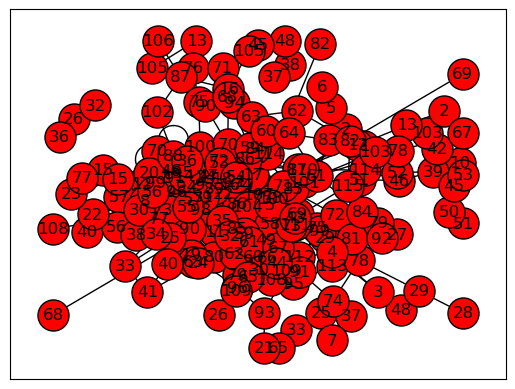

In [51]:
# Applying topsis on each cluster.
import os 
for i in range(K):
    file_size = os.stat(absolute_path+'k_'+str(i)+'.txt').st_size
    if file_size == 0:
        print('cluster ',i,':')
        FF = pd.DataFrame(Final_Tab.loc[i])
        print(FF.T)
    else:
        print('cluster ',i,':')
        apply_w_topsis(i)

In [52]:
for i in range(K):
    res =absolute_path+'data/dataFilter/data'+str(i)+'.csv'
    path = res
    if(os.path.isfile(path) == False):
        print('cluster',i,':')
        FF = pd.DataFrame(Final_Tab.loc[i])
        res = FF.T
        print(res)
    else:
        print('clusterS',i,':')
        res = pd.read_csv(absolute_path+'data/dataFilter/data'+str(i)+'.csv')
        res =res.head(1)
        print(res)
    res.to_csv(absolute_path+'data/res1/res_'+str(i)+'.csv', index=False, encoding='utf-8-sig')
        

clusterS 0 :
   Node  DCN  BCN  CCN
0    25    2    2    2
clusterS 1 :
   Node  DCN  BCN  CCN
0    30   29   29   29
clusterS 2 :
   Node  DCN  BCN  CCN
0   107  107  107  107
clusterS 3 :
   Node  DCN  BCN  CCN
0    68   69   69   69
clusterS 4 :
   Node  DCN  BCN  CCN
0    46   46   46   47
clusterS 5 :
   Node  DCN  BCN  CCN
0   101   97  101   97
clusterS 6 :
   Node  DCN  BCN  CCN
0    87  100   87   84
clusterS 7 :
   Node  DCN  BCN  CCN
0    62   62   62   62
clusterS 8 :
   Node  DCN  BCN  CCN
0    73   73   73   89
clusterS 9 :
   Node  DCN  BCN  CCN
0    61   31   61   61


In [53]:
#then let's take the first node in each cluster and concatenat theme in one file 
# named final_res
import glob
ss = absolute_path+'data/res1/'
extension = 'csv'
all_filenames = [i for i in glob.glob(ss+'*.csv')]
#combine all files in the list



In [54]:
all_filenames

['Data/data2/data/res1\\res_0.csv',
 'Data/data2/data/res1\\res_1.csv',
 'Data/data2/data/res1\\res_2.csv',
 'Data/data2/data/res1\\res_3.csv',
 'Data/data2/data/res1\\res_4.csv',
 'Data/data2/data/res1\\res_5.csv',
 'Data/data2/data/res1\\res_6.csv',
 'Data/data2/data/res1\\res_7.csv',
 'Data/data2/data/res1\\res_8.csv',
 'Data/data2/data/res1\\res_9.csv']

In [55]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
print(combined_csv)
#export to csv
combined_csv.to_csv(absolute_path+"data/res/final_res.csv", index=False, encoding='utf-8-sig')

   Node  DCN  BCN  CCN
0    25    2    2    2
0    30   29   29   29
0   107  107  107  107
0    68   69   69   69
0    46   46   46   47
0   101   97  101   97
0    87  100   87   84
0    62   62   62   62
0    73   73   73   89
0    61   31   61   61


In [56]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [57]:
w_footballK = pd.read_csv(absolute_path+"data/res/final_res.csv")
w_footballK

,Node,DCN,BCN,CCN
0,25,2,2,2
1,30,29,29,29
2,107,107,107,107
3,68,69,69,69
4,46,46,46,47
5,101,97,101,97
6,87,100,87,84
7,62,62,62,62
8,73,73,73,89
9,61,31,61,61


In [58]:
w_football= pd.read_csv("Data/w_Football.csv") 
w_football

,w_DCN,w_BCN,w_CCN,w_ECN,w_Node
0,24,65,42,83,65
1,53,1,107,104,1
2,2,107,115,115,107
3,13,42,36,53,42
4,26,75,26,62,75
5,115,47,29,102,47
6,37,81,1,82,81
7,29,25,81,109,25
8,104,84,5,114,84
9,83,5,68,29,5


# Application SI (top1 in Cluster and top 10 in w_topsis)

In [73]:
def SI(node):
    n = row
    model = ep.SIModel(G)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [74]:
Rank_DC = SI(set(w_footballK['DCN']))
Rank_BC = SI(set(w_footballK['BCN']))
Rank_CC = SI(set(w_footballK['CCN']))
Rank_kmeans = SI(set(w_footballK['Node']))

In [75]:
w_Rank_DC = SI(set(w_football['w_DCN']))
w_Rank_BC = SI(set(w_football['w_BCN']))
w_Rank_CC = SI (set(w_football['w_CCN']))
w_Rank_EC = SI(set(w_football['w_ECN']))
w_Rank_Topsis = SI(set(w_football['w_Node']))

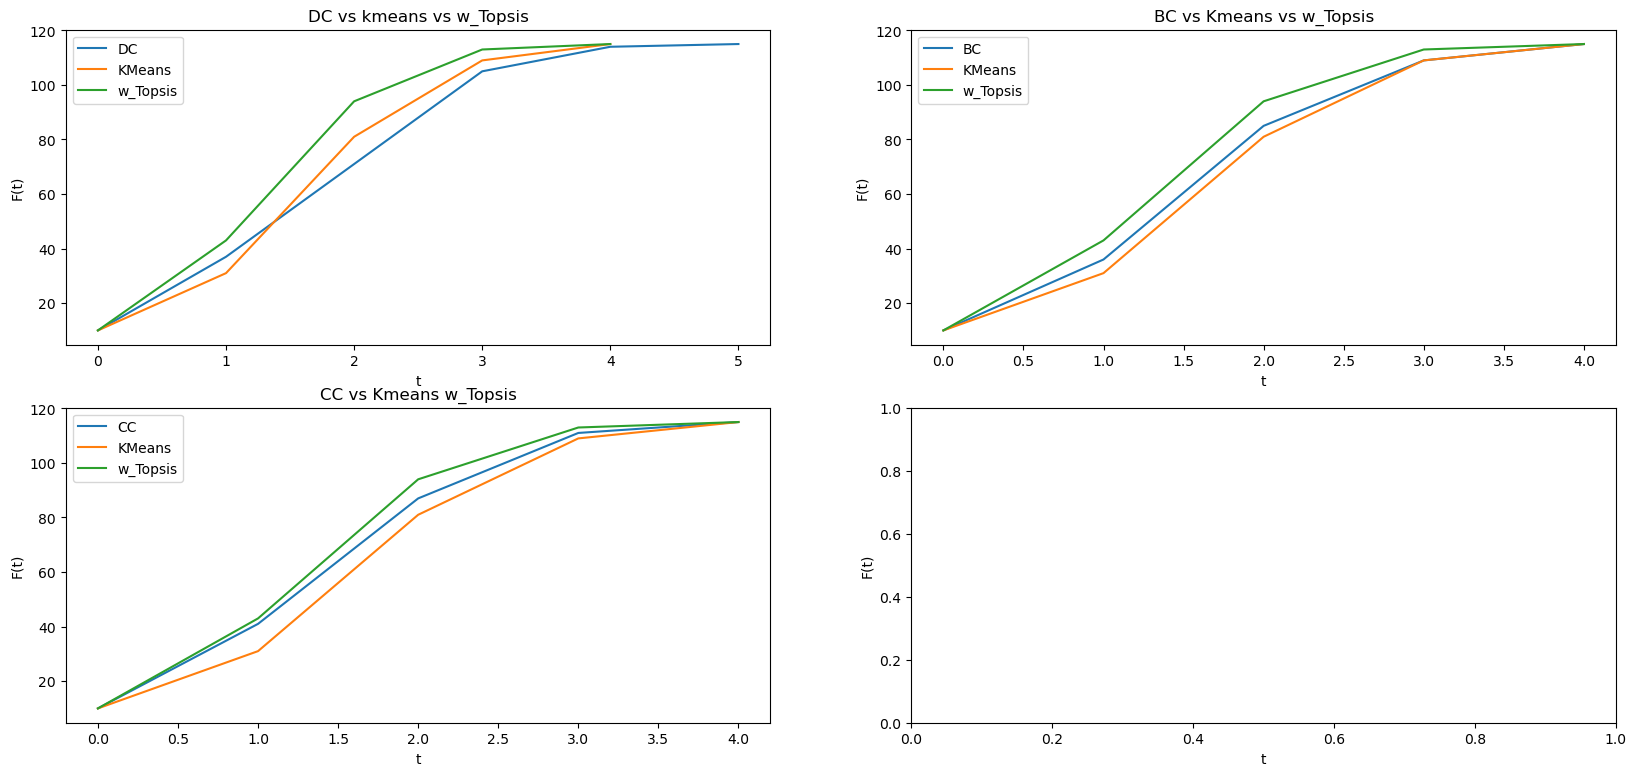

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(20, 9))
axs[0, 0].plot(w_Rank_DC['iteration'], w_Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_kmeans['iteration'],Rank_kmeans['Nb_infected'], label="KMeans")
axs[0, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 0].set_title("DC vs kmeans vs w_Topsis")
axs[0, 0].legend()

axs[0, 1].plot(w_Rank_BC['iteration'], w_Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_kmeans['iteration'], Rank_kmeans['Nb_infected'], label="KMeans")
axs[0, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 1].set_title("BC vs Kmeans vs w_Topsis")
axs[0, 1].legend()

axs[1, 0].plot(w_Rank_CC['iteration'], w_Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_kmeans['iteration'], Rank_kmeans['Nb_infected'], label="KMeans")
axs[1, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 0].set_title("CC vs Kmeans w_Topsis")
axs[1, 0].legend()



for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')